Manually implement the formulas for mean, median, mode, range, variance, and
standard deviation in Python, without using built-in Pandas methods. Calculate
these measures for the columns above (or any of your choosing).

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv("matches.csv")
pd.options.display.max_columns = None

In [3]:
df["Team"].drop_duplicates()

0              ManchesterCity
38                    Arsenal
76                  Liverpool
114                AstonVilla
152          TottenhamHotspur
190                   Chelsea
228           NewcastleUnited
266          ManchesterUnited
304             WestHamUnited
342             CrystalPalace
380     BrightonandHoveAlbion
418               Bournemouth
456                    Fulham
494    WolverhamptonWanderers
532                   Everton
570                 Brentford
608          NottinghamForest
646                 LutonTown
684                   Burnley
722           SheffieldUnited
Name: Team, dtype: object

In [4]:

team_names = {
    "ManchesterCity": "Man City",
    "TottenhamHotspur": "Spurs",
    "NewcastleUnited": "Newcastle",
    "ManchesterUnited": "Man Utd",
    "WestHamUnited": "West Ham",
    "CrystalPalace": "Crystal Palace",
    "BrightonandHoveAlbion": "Brighton",
    "WolverhamptonWanderers": "Wolves",
    "NottinghamForest": "Nott'm Forest",
    "LutonTown": "Luton Town",
    "SheffieldUnited": "Sheff' Utd",
    "AstonVilla": "Aston Villa"
        }
opp_names = {
    "Manchester City": "Man City",
    "Tottenham": "Spurs",
    "Newcastle Utd": "Newcastle",
    "Manchester Utd": "Man Utd",
    "Nott'ham Forest": "Nott'm Forest",
    "Sheffield Utd": "Sheff' Utd"
        }

In [5]:
teams = df.replace({"Team": team_names})["Team"].drop_duplicates().to_list()
opps = df.replace({"Opponent": opp_names})["Opponent"].drop_duplicates().to_list()
## code that prints out team name if it doesn't match both lsits
set(teams).symmetric_difference(set(opps))

df = df.replace({"Team": team_names}).replace({"Opponent": opp_names})

Cleaned Club names so they are consistent in both "Team and "Opponent"
Made the text more readable

In [6]:
df = df.drop(columns=["Unnamed: 0", "Comp", "Match Report", "Notes", "Season"])

Dropped unnecessary columns

In [7]:
df

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Team
0,2023-08-11,20:00,Matchweek 1,Fri,Away,W,3,0,Burnley,1.9,0.3,65.0,21572.0,Kevin De Bruyne,4-2-3-1,Craig Pawson,17.0,8.0,13.9,0.0,0,0,Man City
1,2023-08-19,20:00,Matchweek 2,Sat,Home,W,1,0,Newcastle,1.0,0.3,59.0,53419.0,Kyle Walker,4-2-3-1,Robert Jones,14.0,4.0,17.9,0.0,0,0,Man City
2,2023-08-27,14:00,Matchweek 3,Sun,Away,W,2,1,Sheff' Utd,3.5,0.7,79.0,31336.0,Kyle Walker,4-2-3-1,Jarred Gillett,29.0,9.0,17.3,2.0,0,1,Man City
3,2023-09-02,15:00,Matchweek 4,Sat,Home,W,5,1,Fulham,2.2,1.4,68.0,52899.0,Kyle Walker,4-2-3-1,Michael Oliver,6.0,4.0,14.8,0.0,1,1,Man City
4,2023-09-16,15:00,Matchweek 5,Sat,Away,W,3,1,West Ham,3.6,0.9,68.0,62475.0,Kyle Walker,4-2-3-1,Andy Madley,29.0,13.0,16.4,1.0,0,0,Man City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,2024-04-24,20:00,Matchweek 29,Wed,Away,L,2,4,Man Utd,0.8,2.9,29.0,73549.0,Oliver Arblaster,3-5-2,Michael Salisbury,10.0,4.0,17.8,1.0,0,0,Sheff' Utd
756,2024-04-27,15:00,Matchweek 35,Sat,Away,L,1,5,Newcastle,1.5,3.1,40.0,52196.0,Oliver Arblaster,3-5-2,Tony Harrington,15.0,4.0,13.5,0.0,0,0,Sheff' Utd
757,2024-05-04,15:00,Matchweek 36,Sat,Home,L,1,3,Nott'm Forest,2.2,1.5,54.0,28516.0,Jack Robinson,3-5-2,Chris Kavanagh,16.0,4.0,18.0,0.0,1,1,Sheff' Utd
758,2024-05-11,15:00,Matchweek 37,Sat,Away,L,0,1,Everton,0.6,2.3,42.0,39221.0,Jack Robinson,3-5-2,Stuart Attwell,13.0,1.0,21.0,0.0,0,0,Sheff' Utd


Manually implement the formulas for mean, median, mode, range, variance, and
standard deviation in Python, without using built-in Pandas methods. Calculate
these measures for the columns above (or any of your choosing).

In [8]:
df["xG"]

def mean(list):
    return sum(list)/len(list)

mean(df["xG"])

1.550263157894737

In [9]:
def median(list):
    if len(list) % 2 == 0:
        return list[(len(list)/2) - 1]
    else:
        num = (len(list)/2)
        lower = np.floor(num).astype(int)  
        upper = np.ceil(num).astype(int) 
        return (lower + upper)/2


In [10]:
my_list = []
for x in range(1, 8):
    my_list.append(x)
my_list

[1, 2, 3, 4, 5, 6, 7]

In [11]:
from collections import Counter
def mode(list):
    counter = Counter(list)
    mode_list = counter.most_common(1)
    return mode_list[0][0] if mode_list else None

Using pandas functions

In [12]:
num_columns =["GF", "GA", "xG", "Sh", "Poss", "Attendance"] # removed attendance 
df[num_columns].mean()


GF                1.639474
GA                1.639474
xG                1.550263
Sh               13.660526
Poss             50.000000
Attendance    38613.313158
dtype: float64

In [13]:
df[num_columns].median()

GF                1.0
GA                1.0
xG                1.4
Sh               13.0
Poss             50.0
Attendance    38181.0
dtype: float64

In [14]:
df[num_columns].mode()


,GF,GA,xG,Sh,Poss,Attendance
0,1.0,1.0,1.0,10.0,45.0,25103.0
1,NaN,NaN,NaN,12.0,55.0,62475.0


Comparing stats between Man City and Arsenal Attendances


In [15]:
ars = df[df['Opponent'].str.contains('Arsenal')]
mci_ars = ars[ars['Team'].str.contains('Man City')]
mci_ars

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Sh,SoT,Dist,FK,PK,PKatt,Team
7,2023-10-08,16:30,Matchweek 8,Sun,Away,L,0,1,Arsenal,0.5,0.4,51.0,60233.0,Kyle Walker,4-3-3,Michael Oliver,4.0,0.0,14.9,0.0,0,0,Man City
28,2024-03-31,16:30,Matchweek 30,Sun,Home,D,0,0,Arsenal,1.0,0.7,72.0,52178.0,Kevin De Bruyne,4-1-4-1,Anthony Taylor,12.0,1.0,14.2,0.0,0,0,Man City


/tmp/ipykernel_83780/3603483994.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(current_labels)


[Text(0, 0, 'Emirates'), Text(1, 0, 'Etihad')]

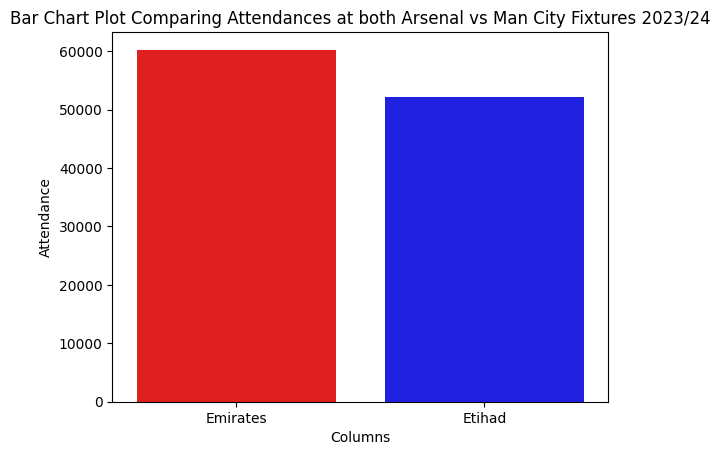

In [16]:
sns.barplot(data=mci_ars, x="Venue", y="Attendance", hue="Venue", palette=["red", "blue"])
plt.title("Bar Chart Plot Comparing Attendances at both Arsenal vs Man City Fixtures 2023/24")

plt.xlabel("Columns")
plt.ylabel("Attendance")

new_labels = {'Away': 'Emirates', 'Home': 'Etihad'}

# Get current x-tick labels
current_labels = plt.gca().get_xticklabels()

# Rename specific bars by modifying their labels
for i, label in enumerate(current_labels):
    if label.get_text() in new_labels:
        current_labels[i] = plt.Text(0, 0, new_labels[label.get_text()])

# Apply new labels to the plot
plt.gca().set_xticklabels(current_labels)


Comparing season-long averages between Arsenal vs Man City

In [17]:
plot_columns = [item for item in num_columns if item != "Attendance"]
plot_columns

ars = df[df['Opponent'].str.contains('Arsenal')]
ars_stats = ars[plot_columns].mean()
man_city = df[df['Team'].str.contains('Man City')]
man_city_stats = man_city[plot_columns].mean()

In [18]:
man_city_stats.reset_index(name="Man City")
ars_stats.reset_index(name="Arsenal")

combined_stats = pd.merge(man_city_stats.reset_index(name="Man City"),
        ars_stats.reset_index(name="Arsenal"), on="index")

combined_stats.set_index('index', inplace=True)

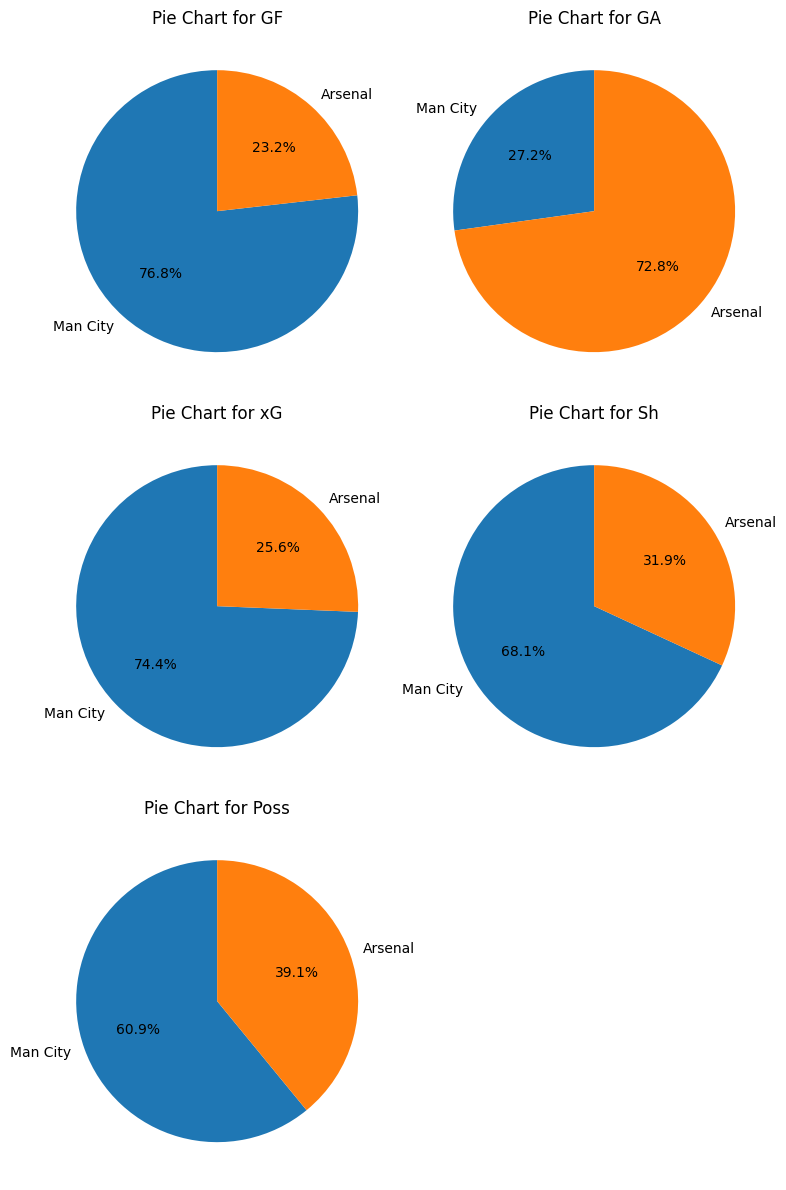

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(8, 12))

for i, index in enumerate(combined_stats.index):
    # Get the row and column index for the current subplot
    row = i // 2
    col = i % 2
    axes[row, col].pie(combined_stats.loc[index], labels=combined_stats.columns, autopct='%1.1f%%', startangle=90)
    axes[row, col].set_title(f'Pie Chart for {index}')
    axes[row, col].axis('equal')
axes[2, 1].axis('off') 
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

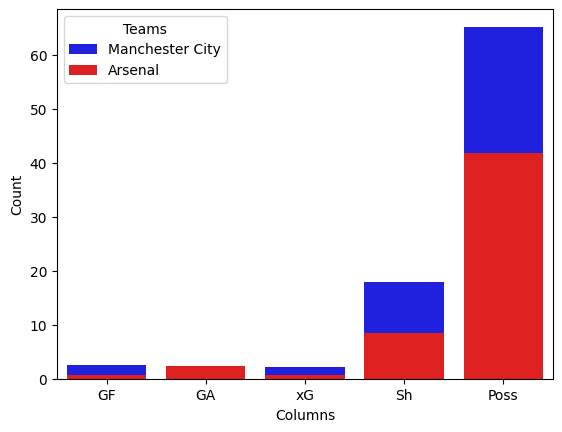

In [20]:
sns.barplot(man_city_stats, color='blue', label="Manchester City")
sns.barplot(ars_stats, color = "red", label = "Arsenal")
plt.xlabel("Columns")
plt.legend(title="Teams")
plt.ylabel("Count")

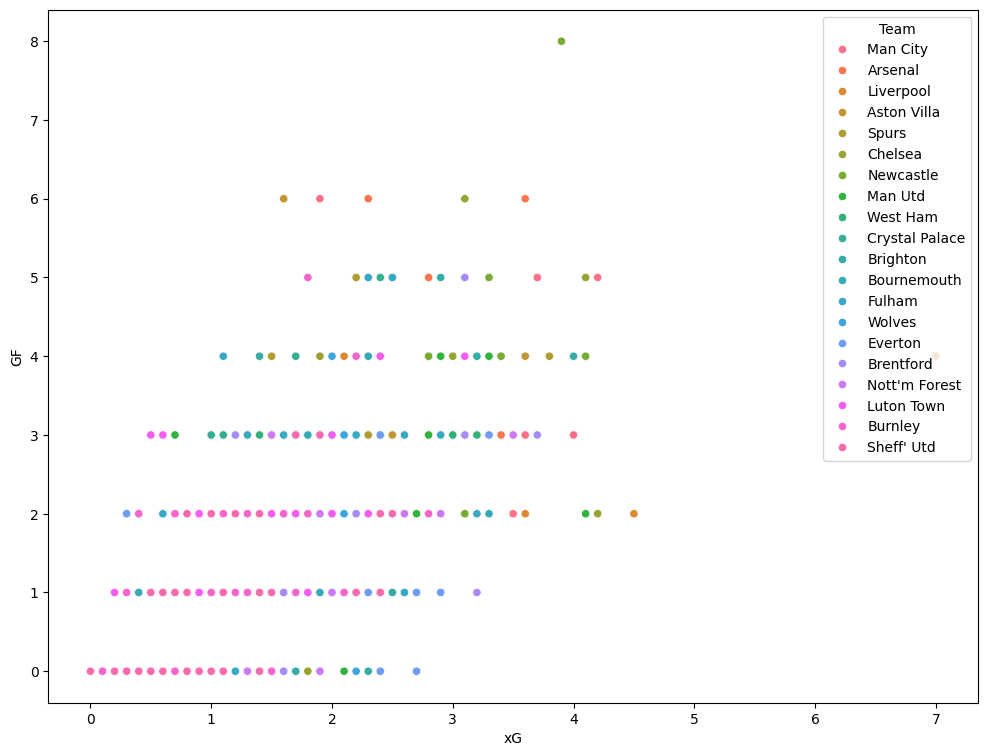

In [21]:
plt.figure(figsize=(12, 9))
sns.scatterplot(data=df, x="xG", y="GF", hue="Team")

# plt.title("")
plt.show()

In [22]:
meanxg = df.groupby("Team")["xG"].mean().reset_index(name="mean(xG)")
meanxga = df.groupby("Team")["xGA"].mean().reset_index(name="mean(GA)")
meangf = df.groupby("Team")["GF"].mean().reset_index(name="mean(GF)")



merge_xg_xga = pd.merge(meanxg, meanxga, on="Team")
merge_xg_xga = pd.merge(merge_xg_xga,meangf, on="Team")
merge_xg_xga

,Team,mean(xG),mean(GA),mean(GF)
0,Arsenal,2.007895,0.731579,2.394737
1,Aston Villa,1.671053,1.578947,2.000000
2,Bournemouth,1.473684,1.528947,1.421053
3,Brentford,1.531579,1.473684,1.473684
4,Brighton,1.489474,1.465789,1.447368
5,Burnley,1.068421,1.842105,1.078947
6,Chelsea,1.960526,1.534211,2.026316
7,Crystal Palace,1.281579,1.373684,1.500000
8,Everton,1.407895,1.455263,1.052632
9,Fulham,1.336842,1.657895,1.447368


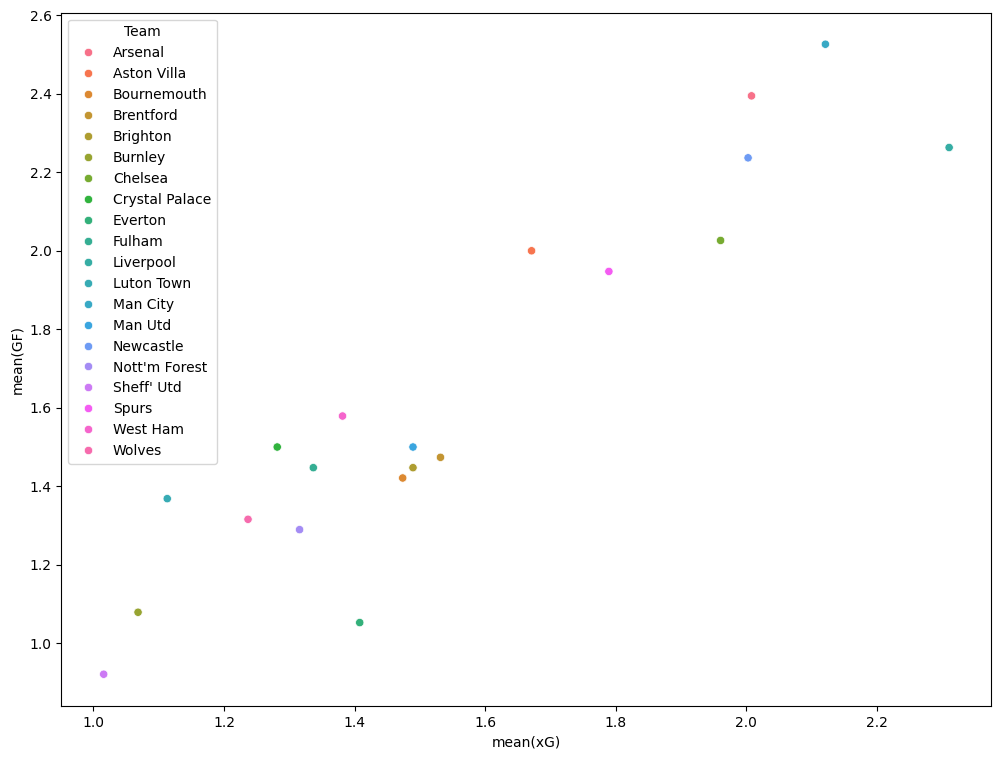

In [23]:
plt.figure(figsize=(12, 9))
sns.scatterplot(data=merge_xg_xga, x="mean(xG)", y="mean(GF)", hue="Team")

# plt.title("")
plt.show()

In [24]:
team_points = {
    'Arsenal': 89,
    'Aston Villa': 68,
    'Bournemouth': 40,
    'Brentford': 31,
    'Brighton': 48,
    'Burnley': 30,
    'Chelsea': 63,
    'Crystal Palace': 49,
    'Everton': 35,
    'Fulham': 45,
    'Liverpool': 82,
    'Luton Town': 28,
    'Man City': 91,
    'Man Utd': 60,
    'Newcastle': 60,
    "Nott'm Forest": 32,
    "Sheff' Utd": 20,
    'Spurs': 66,
    'West Ham': 52,
    'Wolves': 38
}

team_points = pd.DataFrame(list(team_points.items()), columns=['Team', 'Points'])
merge_xg_xga = pd.merge(merge_xg_xga, team_points, on="Team")
mean_poss = df.groupby("Team")["Poss"].mean().reset_index(name="mean(Poss)")
merge_xg_xga = pd.merge(merge_xg_xga,mean_poss, on="Team")



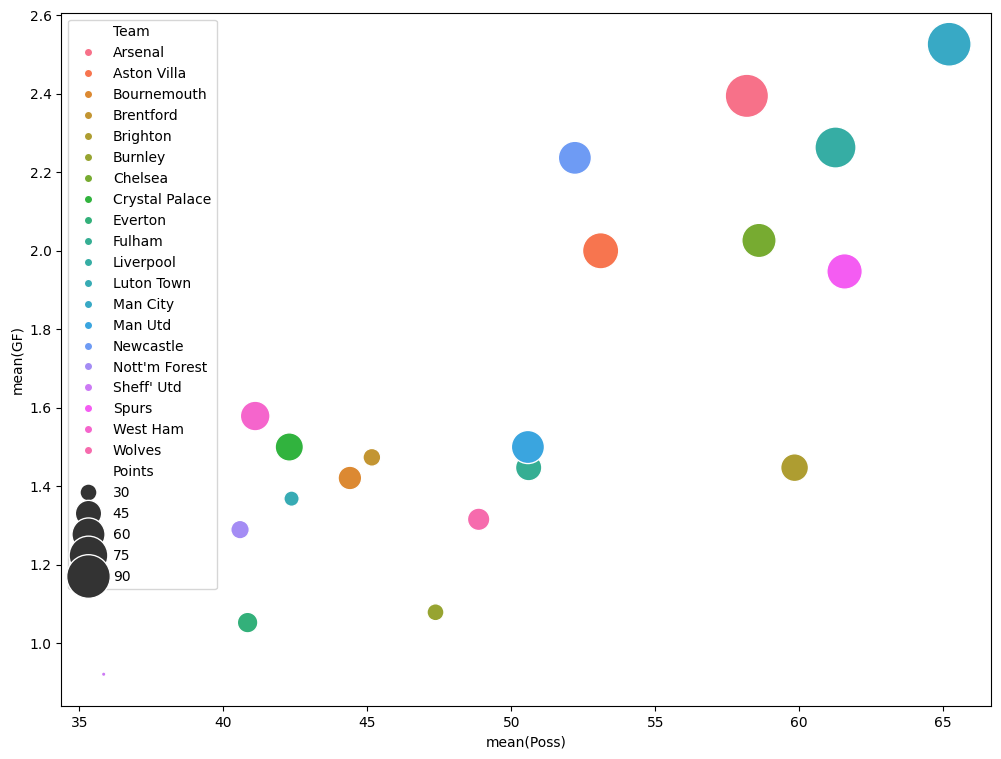

In [25]:
plt.figure(figsize=(12, 9))
sns.scatterplot(data=merge_xg_xga, x="mean(Poss)", y="mean(GF)", hue="Team", size="Points",  sizes=(10, 1000))

# plt.title("")
plt.show()

extra

In [26]:
url = "https://fbref.com/en/comps/9/2023-2024/wages/2023-2024-Premier-League-Wages"

In [27]:
wages_df = pd.read_html(url)[0]
wages_df["Annual Wages"] = wages_df["Annual Wages"].str.extract(r'£\s*([\d,]+)')[0].str.replace(',', '', regex=True).astype(int)
wages_df["Weekly Wages"] = wages_df["Weekly Wages"].str.extract(r'£\s*([\d,]+)')[0].str.replace(',', '', regex=True).astype(int)

In [28]:
wages_df["Squad"].to_dict()

{0: 'Manchester Utd',
 1: 'Manchester City',
 2: 'Arsenal',
 3: 'Chelsea',
 4: 'Liverpool',
 5: 'Tottenham',
 6: 'Aston Villa',
 7: 'West Ham',
 8: 'Newcastle Utd',
 9: 'Everton',
 10: "Nott'ham Forest",
 11: 'Crystal Palace',
 12: 'Fulham',
 13: 'Brighton',
 14: 'Bournemouth',
 15: 'Wolves',
 16: 'Brentford',
 17: 'Burnley',
 18: 'Sheffield Utd',
 19: 'Luton Town'}

In [29]:
teams

['Man City',
 'Arsenal',
 'Liverpool',
 'Aston Villa',
 'Spurs',
 'Chelsea',
 'Newcastle',
 'Man Utd',
 'West Ham',
 'Crystal Palace',
 'Brighton',
 'Bournemouth',
 'Fulham',
 'Wolves',
 'Everton',
 'Brentford',
 "Nott'm Forest",
 'Luton Town',
 'Burnley',
 "Sheff' Utd"]

In [36]:
my_dict = {'Manchester Utd': "Man Utd",
             'Manchester City': "Man City",
             'Tottenham': "Spurs",
             'Newcastle Utd': "Newcastle",
             "Nott'ham Forest": "Nott'm Forest",
             'Sheffield Utd': "Sheff' Utd"
}

1     Manchester City
0      Manchester Utd
8       Newcastle Utd
10    Nott'ham Forest
18      Sheffield Utd
5           Tottenham

In [35]:
wages_df = wages_df.replace({"Team": my_dict}).rename(columns={"Squad": "Team"})
wages_df


,Rk,Team,# Pl,Weekly Wages,Annual Wages,% Estimated
0,1,Man Utd,57,3956846,205756000,24%
1,2,Man City,48,3866000,201032000,36%
2,3,Arsenal,52,3193000,166036000,12%
3,4,Chelsea,60,3020000,157040000,51%
4,5,Liverpool,49,2620000,136240000,43%
5,6,Spurs,61,2260000,117520000,38%
6,7,Aston Villa,52,2252885,117150000,47%
7,8,West Ham,46,1833000,95316000,29%
8,9,Newcastle,57,1625000,84500000,36%
9,10,Everton,46,1518808,78978000,52%


In [37]:
wages_df["Team"].sort_values()


2            Arsenal
6        Aston Villa
14       Bournemouth
16         Brentford
13          Brighton
17           Burnley
3            Chelsea
11    Crystal Palace
9            Everton
12            Fulham
4          Liverpool
19        Luton Town
1           Man City
0            Man Utd
8          Newcastle
10     Nott'm Forest
18        Sheff' Utd
5              Spurs
7           West Ham
15            Wolves
Name: Team, dtype: object

In [38]:
wages_and_goals = pd.merge(merge_xg_xga, wages_df, on="Team")
wages_and_goals["Team"].sort_values()


0            Arsenal
1        Aston Villa
2        Bournemouth
3          Brentford
4           Brighton
5            Burnley
6            Chelsea
7     Crystal Palace
8            Everton
9             Fulham
10         Liverpool
11        Luton Town
12          Man City
13           Man Utd
14         Newcastle
15     Nott'm Forest
16        Sheff' Utd
17             Spurs
18          West Ham
19            Wolves
Name: Team, dtype: object

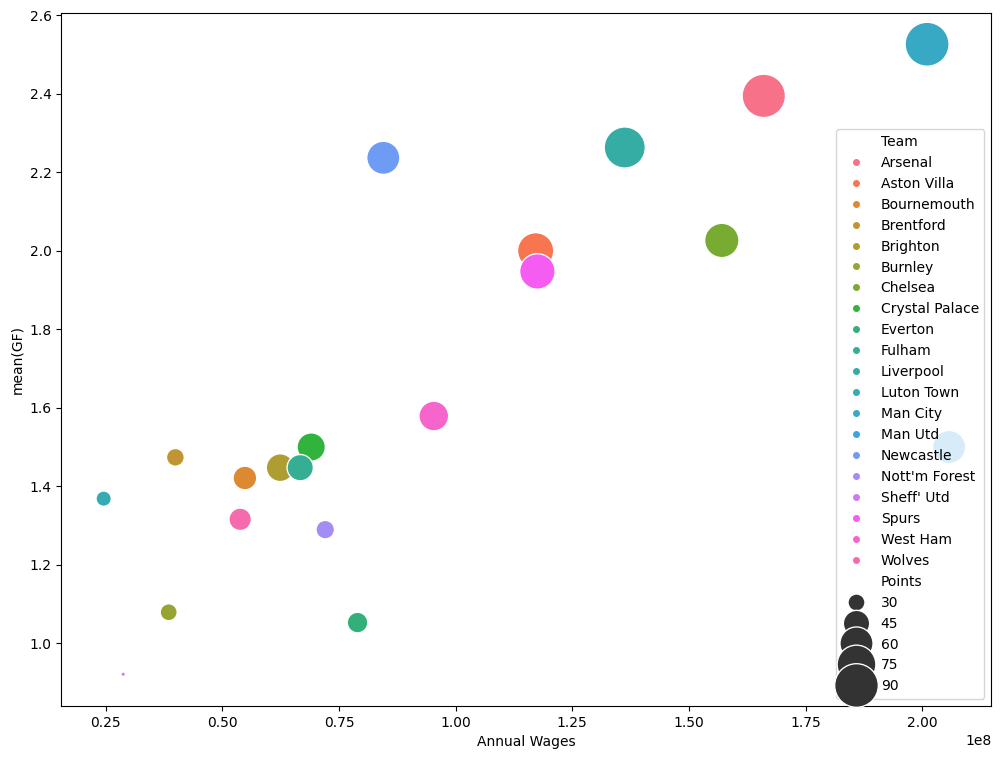

In [39]:
plt.figure(figsize=(12, 9))
sns.scatterplot(data=wages_and_goals, x="Annual Wages", y="mean(GF)", hue="Team", size="Points",  sizes=(10, 1000))

# plt.title("")
plt.show()

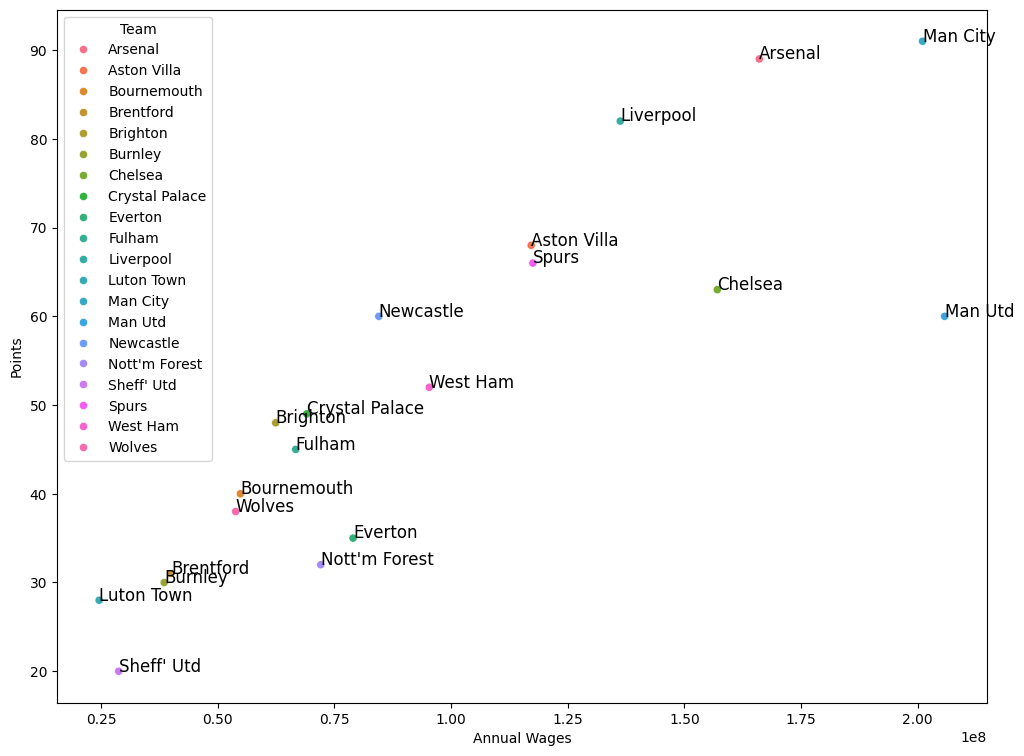

In [40]:
plt.figure(figsize=(12, 9))
sns.scatterplot(data=wages_and_goals, x="Annual Wages", y="Points", hue="Team",  sizes=(10, 1000))

for i, row in wages_and_goals.iterrows():
    plt.text(row['Annual Wages'] + 0.1, row['Points'], row['Team'], fontsize=12, ha='left')

# plt.title("")
plt.show()

In [46]:
attend = df.groupby("Team")["Attendance"].mean().reset_index(name='mean(Attendance)').sort_values(by="mean(Attendance)", ascending=False)
attend

,Team,mean(Attendance)
13,Man Utd,55345.947368
18,West Ham,49810.973684
17,Spurs,49515.131579
0,Arsenal,48847.052632
10,Liverpool,46911.763158
12,Man City,45562.947368
14,Newcastle,45033.552632
1,Aston Villa,40042.605263
6,Chelsea,39049.763158
8,Everton,38956.789474


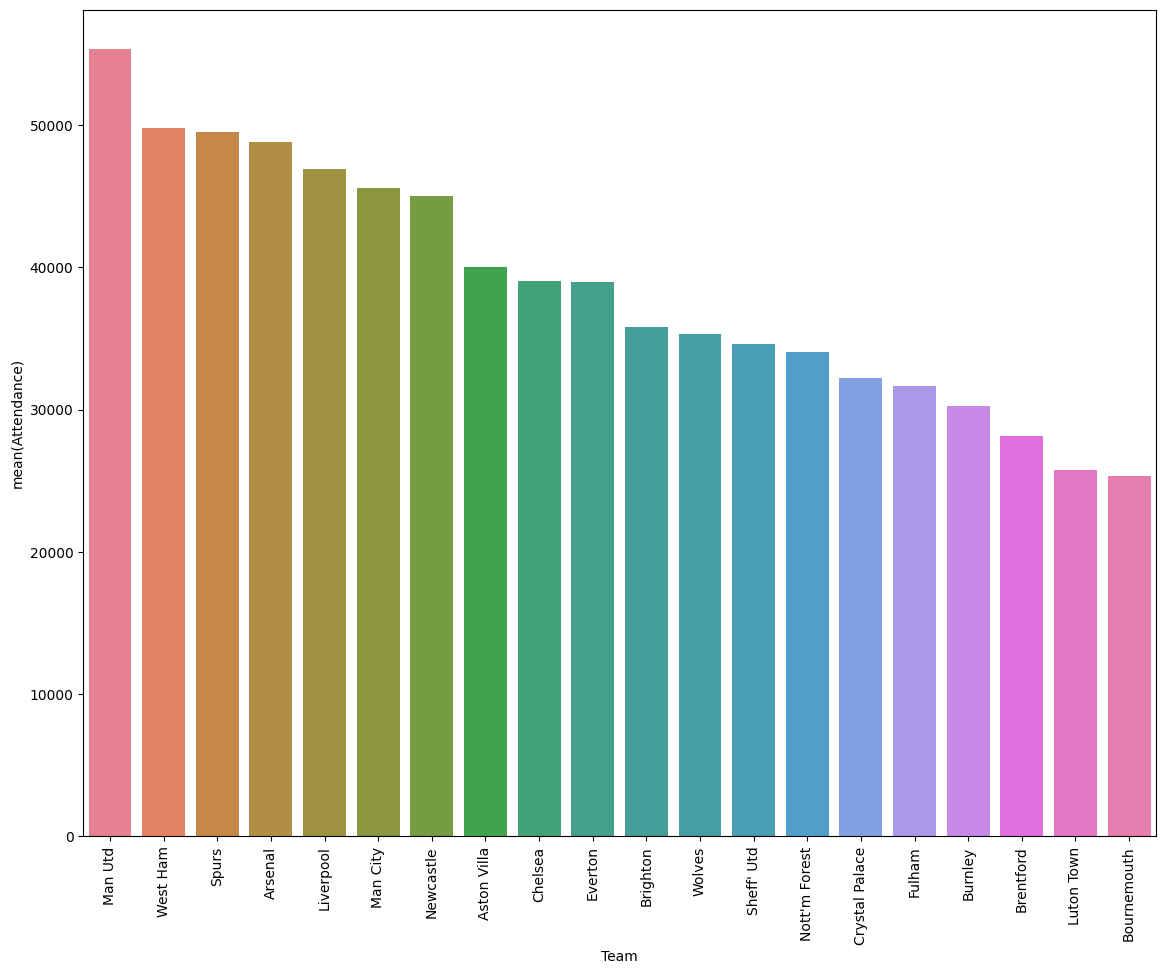

In [50]:
plt.figure(figsize=(12, 9))
sns.barplot(data=attend, x="Team", y="mean(Attendance)", hue="Team")
# plt.title("")#
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

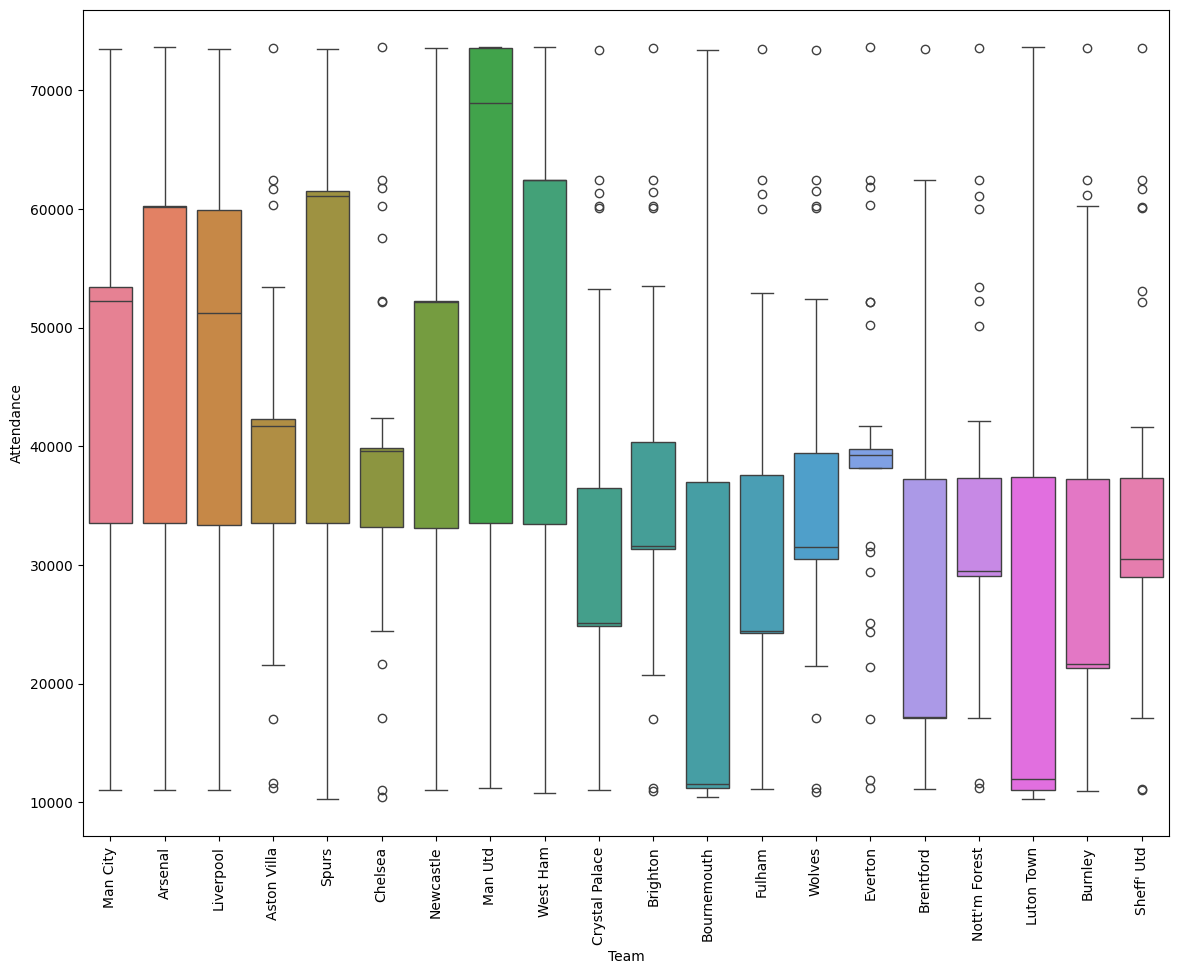

In [51]:
plt.figure(figsize=(12, 9))
sns.boxplot(data=df, x="Team", y="Attendance", hue="Team")
# plt.title("")#
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()